- KEYWORDS: solve_ivp, meshgrid, quiver



# Families of solutions to FODEs



Consider $y' = x - y$.

We can interpret this equation as one that defines a direction field. That is, at any given point (x, y) we can compute the derivative of a solution at that point. We will consider how to make a plot that shows this field, and that will help us estimate what solutions to the ODE might look like for different initial values.

To do this, we should compute the derivative on an array of regularly spaced points in both $x$ and $y$, and then making a plot of that data.

We need to see a couple of new ideas to make this plot efficiently. What we want is a 2-d plot of a regular grid of (x, y) points, and at each of those points the derivative (dx/dx, dy/dx).

First, we will need to create four arrays:

1.  a 2d array of all the x-positions
2.  a 2d array of all the y-positions
3.  a 2d array of the dx/dx = 1 values
4.  a 2d array of the dy/dx values.

We want to generate the x, y arrays. We use `np.meshgrid` for this. The simplest way to do it is to use `np.linspace` to create 1-D arrays with the spacing we want, and then use `np.meshgrid` to generate the 2D arrays. Let's say we want a uniform grid over the range of x from 0 to 1, and over the range of y from 0 to 3, with 5 points in each direction.



In [1]:
import numpy as np

x = np.linspace(0, 1, 5)
y = np.linspace(0, 3, 5)

X, Y = np.meshgrid(x, y)
X, Y

(array([[ 0.  ,  0.25,  0.5 ,  0.75,  1.  ],
        [ 0.  ,  0.25,  0.5 ,  0.75,  1.  ],
        [ 0.  ,  0.25,  0.5 ,  0.75,  1.  ],
        [ 0.  ,  0.25,  0.5 ,  0.75,  1.  ],
        [ 0.  ,  0.25,  0.5 ,  0.75,  1.  ]]),
 array([[ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.75,  0.75,  0.75,  0.75,  0.75],
        [ 1.5 ,  1.5 ,  1.5 ,  1.5 ,  1.5 ],
        [ 2.25,  2.25,  2.25,  2.25,  2.25],
        [ 3.  ,  3.  ,  3.  ,  3.  ,  3.  ]]))

Now, we have X, Y arrays that map out all the (x, y) pairs we want to consider. So, the (x, y) pair in the second row and third column of the array is:



In [1]:
(X[1, 2], Y[1, 2])

(0.5, 0.75)

These are arrays, so we can do math with them.



In [1]:
X - Y

array([[ 0.  ,  0.25,  0.5 ,  0.75,  1.  ],
       [-0.75, -0.5 , -0.25,  0.  ,  0.25],
       [-1.5 , -1.25, -1.  , -0.75, -0.5 ],
       [-2.25, -2.  , -1.75, -1.5 , -1.25],
       [-3.  , -2.75, -2.5 , -2.25, -2.  ]])

In [1]:
np.sqrt(X**2 + Y**2)

array([[ 0.        ,  0.25      ,  0.5       ,  0.75      ,  1.        ],
       [ 0.75      ,  0.79056942,  0.90138782,  1.06066017,  1.25      ],
       [ 1.5       ,  1.52069063,  1.58113883,  1.67705098,  1.80277564],
       [ 2.25      ,  2.26384628,  2.30488611,  2.37170825,  2.46221445],
       [ 3.        ,  3.01039864,  3.04138127,  3.09232922,  3.16227766]])

Now we are ready to compute a distance field for the FODE. We will consider the range from -1 to 1 in both x and y, and then plot the results with `matplotlib.pyplot.quiver`.



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

Review the documentation for this function:



In [1]:
?plt.quiver

We define the ode function, create the grids, and then make the plot.



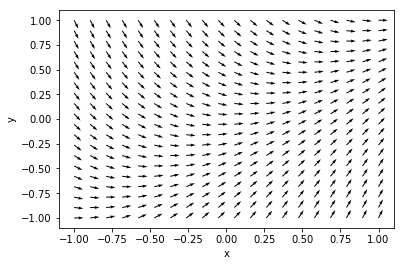

In [1]:
def yprime(x, y):
    return x - y

x = np.linspace(-1, 1, 20)
y = np.linspace(-1, 1, 20)

X, Y = np.meshgrid(x, y)
U = np.ones(X.shape)  # dx/dx
V = yprime(X, Y)  # dy/dx

# This normalizes the arrows so they are all the same length
N = np.sqrt(U**2 + V**2)
U /= N
V /= N

plt.quiver(X, Y, U, V)
plt.xlabel('x')
plt.ylabel('y')

If you pick a point, the arrows show you which way the solution goes from there. You just follow the arrows to get an approximate solution to this equation. Let's consider some specific solutions. Suppose we start with the initial condition that $y(-1) = 0$. You can trace the arrows to estimate where the solution goes.

Let us use a numerical solver to see how it works.



In [1]:
from scipy.integrate import solve_ivp

sol = solve_ivp(yprime, (-1, 1), (0,), t_eval=np.linspace(-1, 1))
sol.message  # you should at least check this message to see if it worked.

'The solver successfully reached the interval end.'

Now, we plot the solution



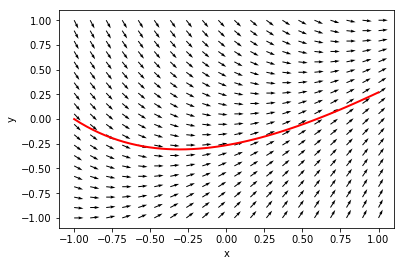

In [1]:
plt.plot(sol.t, sol.y[0], 'r', lw=2)
plt.quiver(X, Y, U, V)
plt.xlabel('x')
plt.ylabel('y')

Here are some more examples.



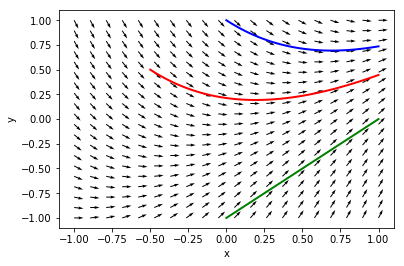

In [1]:
sol2 = solve_ivp(yprime, (-0.5, 1), (0.5,), t_eval=np.linspace(-0.5, 1))
sol3 = solve_ivp(yprime, (0.0, 1), (-1,), t_eval=np.linspace(0.0, 1))
sol4 = solve_ivp(yprime, (0.0, 1), (1,), t_eval=np.linspace(0.0, 1))

plt.plot(sol2.t, sol2.y[0], 'r', lw=2)
plt.plot(sol3.t, sol3.y[0], 'g', lw=2)
plt.plot(sol4.t, sol4.y[0], 'b', lw=2)

# overlay the direction field
plt.quiver(X, Y, U, V)
plt.xlabel('x')
plt.ylabel('y')

You can see the solution looks different depending on the initial condition, but in each case the solution follows the direction field.

Direction field plots can be very helpful to visualize what nearby solutions might look like, or to get a qualitative idea of what a solution might look like, or to see if anything unusual happens in the solution space. We will see them again when we consider systems of differential equations.

**Exercise:** Make a direction field plot for $y'=-y$ for the range of x from 0 to 4. What does the direction field tell you? How does this compare to what you know from the solution?




# Systems of first-order differential equations



Many engineering systems are governed by *systems of coupled* differential equations. This usually means there are two or more independent variables and outputs, and the rate of change of the outputs depends on two or more of the independent variables.

Let's consider the following tank mixing problem. You have two tanks: Tank A has 30 gallons containing 55 ounces of dissolved salt, and Tank B has 20 gallons containing 26 ounces of salt. Additionally,

-   Water with a salt concentration of 1 oz/gal flows into Tank A at a rate of 1.5 gal/min.
-   Water with a salt concentration of 3 oz/gal flows into Tank B at a rate of 1 gal/min
-   Water flows from Tank A to Tank B at a rate of 3 gal/min.
-   Water flows from Tank B to Tank A at a rate of 1.5 gal/min
-   Water drains from Tank B at a rate of 2.5 gal/min.

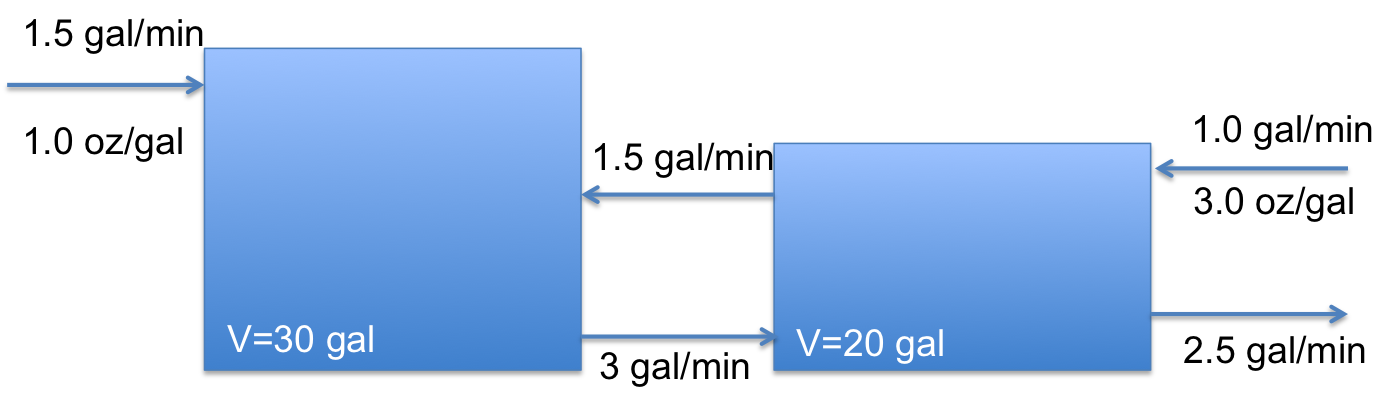 

Plot the concentration of salt in Tank A and B as a function of time.

First, we can define initial conditions.



In [1]:
V_A = 30 # gal
V_B = 20 # gal

S_A0 = 55 / V_A # oz/gallon in Tank A at T=0
S_B0 = 26 / V_B # oz/gallon in Tank B at T=0

S_A0, S_B0

(1.8333333333333333, 1.3)

Now, let's define the flow rates and check the net volumetric flow into each tank.



In [1]:
f_A = 1.5 # volumetric flow into A gal/min
C_A = 1   # salt concentration in flow oz/gal

f_B = 1.0 # volumetric flow into B, gal/min
C_B = 3   # salt concentration into B, oz/gal

f_AB = 3 # flow from A to B, gal/min
f_BA = 1.5 # flow from B to A, gal/min

f_Bexit = 2.5  # flow out of B

print(f'Net flow into A = {f_A - f_AB + f_BA} gal/min')
print(f'Net flow into B = {f_B + f_AB - f_BA - f_Bexit} gal/min')

Net flow into A = 0.0 gal/min
Net flow into B = 0.0 gal/min

You can see the net volumetric flow in each tank is 0, so we do not have to worry about the volumes changing.

We seek solutions for $S_A(t)$ and $S_B(t)$ where $S_x(t)$ represents the concentration (in oz/gal). Since these change with time, we need to solve the mass balances:

$\frac{dS_A}{dt} = \frac{1}{V_A}(f_A C_A - f_{AB} S_A(t) + f_{BA} S_B(t))$

and

$\frac{dS_B}{dt} = \frac{1}{V_B}(f_B C_B + f_{AB} S_A(t) - F_{BA} S_B(t) - F_{Bexit} S_B(t))$

Before we get into the solution, what should we expect to happen here? The concentration of salt into tank A is less than the initial concentration, and the initial concentration in Tank B is also lower than in Tank A, so we expect the concentration in Tank A to start decreasing. Similarly, we expect the concentration in Tank B to start rising since the concentration in each incoming stream is higher than the initial concentration.

At some point, the two tanks will reach a steady state, but it is not evident how we will approach that steady state. Since the concentration of one stream is higher than all the other concentrations, it is possible for the concentration to go up and then down.



In [1]:
def dSdt(t, S):
    S_A = S[0]
    S_B = S[1]
    dSadt = (f_A * C_A - f_AB * S_A + f_BA * S_B) / V_A
    dSbdt = (f_B * C_B + f_AB * S_A - f_BA * S_B - f_Bexit * S_B) / V_B
    return np.array([dSadt, dSbdt])

from scipy.integrate import solve_ivp

S0 = np.array([S_A0, S_B0])
tspan = np.array([0, 200])

# there is a new syntax here. *tspan means to "unpack" tspan into this position
# it is equivalent to:
# teval = np.linspace(tspan[0], tspan[1], 100)
teval = np.linspace(*tspan, 100)

sol = solve_ivp(dSdt, tspan, S0, t_eval=teval)

The shape of our solution is two rows by 50 columns.



In [1]:
sol.y.shape

(2, 100)

One way to plot these solutions is this, where we extract out each row of the solution:



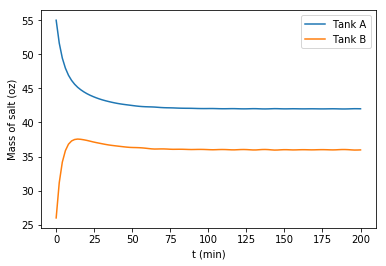

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(sol.t, sol.y[0] * V_A, label='Tank A')
plt.plot(sol.t, sol.y[1] * V_B, label='Tank B')
plt.xlabel('t (min)')
plt.ylabel('Mass of salt (oz)')
plt.legend()

Another way is to convert the solution to an array where the data we want to plot is in columns. We can achieve this by *transposing* the array to convert it from 2 rows with 50 columns to 50 rows with 2 columns.



In [1]:
sol.y.T.shape

(100, 2)

Now, we can also multiply each row by the volumes to get the mass of salt in each tank.



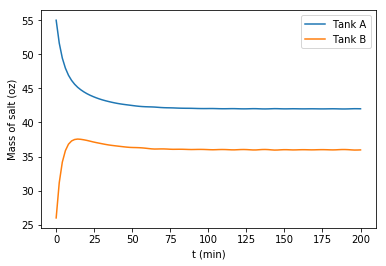

In [1]:
plt.plot(sol.t, sol.y.T * [V_A, V_B])
plt.xlabel('t (min)')
plt.ylabel('Mass of salt (oz)')
plt.legend(['Tank A', 'Tank B'])

This works because you can plot an array where the values to be plotted are all in columns.




## Brief review



For systems of first order differential equations, you need to:

1.  Define a function $y'(t, y)$ where $y$ will be an array of values. The function must return an array that is the same shape as $y$. For example, if you have two equations, $y$ will contain the two function values, and $y'$ must return two derivative values.
2.  You also need two initial conditions, one for each function, at the same value of $t$.
3.  The solution from solve\_ivp will return an array for the y-values, with each function in *a row* of that array. You can either extract the rows to plot them, or transpose the array and plot them all.




## Predator-prey model example



The Lotka-Volterra model can be used to simulate predator-prey populations. Suppose we have $u$ preys (e.g. rabbits) and $v$ predators (e.g. foxes). Then, we can do a "mass balance" on each species as

$\frac{du}{dt} = a u - b u v$

$\frac{dv}{dt} = -c v + d b u v$

Here $a$ is the natural growth rate of rabbits with no foxes. $b$ is the rate that foxes eat rabbits. $c$ is the rate that foxes die, and $d$ describes how many new foxes result from the rabbits that are eaten. Suppose we start with 10 rabbits and 5 foxes. Plot the number of each species from t=0 to t=15.



In [1]:
a = 1.
b = 0.1
c = 1.5
d = 0.75

Y0 = np.array([10, 5])
tspan = (0, 15)
teval = np.linspace(*tspan, 1500)

def dXdt(t, X):
    rabbits, foxes = X
    drabbitdt = a * rabbits - b * rabbits * foxes
    dfoxesdt = -c * foxes + d * b * rabbits * foxes
    return np.array([drabbitdt, dfoxesdt])

from scipy.integrate import solve_ivp
sol = solve_ivp(dXdt, tspan, Y0, t_eval=teval)
sol.message

'The solver successfully reached the interval end.'

(0, 15)

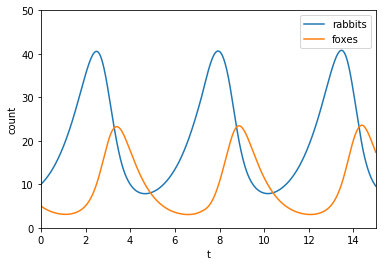

In [1]:
plt.plot(sol.t, sol.y.T)
plt.ylim([0, 50])
plt.legend(['rabbits', 'foxes'], loc='upper right')
plt.xlabel('t')
plt.ylabel('count')
plt.xlim(tspan)

This is a classic boom/bust cycle of predator/prey.




## Qualitative method for systems of ODEs



We can consider direction fields for systems of ODEs to examine the qualitative behavior of solutions when there are two equations. The key here is to compute for each point (rabbit, fox) we compute (drabbit/dt, dfox/dt), and then plot these.



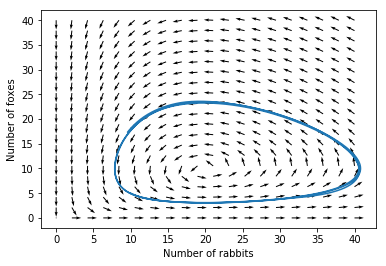

In [1]:
r = np.linspace(0, 40, 20) # rabbit grid
f = np.linspace(0, 40, 20) # fox grid

R, F = np.meshgrid(r, f) # 2D arrays of (rabbit, fox) points

DR, DF = dXdt(0, [R, F])

# This normalizes the arrows so they are all the same length and just show the direction
N = np.sqrt(DR**2 + DF**2)
N[N==0] = 1 # eliminate / 0 errors, it is sort of optional.
DR /= N
DF /= N

plt.quiver(R, F, DR, DF)
plt.xlabel('Number of rabbits')
plt.ylabel('Number of foxes')
plt.plot(sol.y[0], sol.y[1]);

In this view, we have a *limit cycle* which just shows the number of rabbits and foxes goes up and down periodically as you travel around the solution curve. Time is parametric in this plot. It starts at t=0 at the initial state, and increases as you go around the cycle.




# Summary



Systems of first order differential equations are solved the same way as single first order differential equations. The main difference is the system must be defined as:

$Y'(t) = f(x, Y)$

where $Y'$ is a vector/array of first derivatives, and $Y$ is a vector/array of function values.

You still use `scipy.integrate.solve_ivp` to solve the equations, but you need an initial condition for each equation.

<div class="alert alert-warning">
There are other ode integrators in scipy that have different function signatures than `scipy.integrate.solve_ivp`.

For example, `scipy.integrate.odeint` requires functions like $y' = f(y, t)$ which is the opposite of `scipy.integrate.solve_ivp`. You **have** to keep track of which one you are using.

`scipy.integrate.odeint` is older than `scipy.integrate.solve_ivp`, but it has fewer features (e.g. no events, fewer solver options).
</div>

